In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv(r"C:\Users\kdhou\OneDrive\Documents\kaggle\Titanic - Machine Learning from Distaster\train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, we look at information about the data using describe() and info().

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the info, it looks like we have some missing values in some of the columns. Let's check how many are in each column and clean that up.

In [5]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It's pretty safe to say that the cabin number won't give us much info, unless we have a way of locating where each cabin was on the ship. Embarked is in this category as well, since passengers likely weren't selected to survived based off of their embarking city. Hence, we drop both these columns, since they also have missing values.

In [9]:
df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


Age also has many missing values, but we can't just drop the column altogether. If we drop the rows instead, we go from 891 rows to 714. A sizable loss, but imputing the data would skew our results, so it's really the only way to deal with this.

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 61.4+ KB


We also check for any duplicates within the dataset. 

In [11]:
df.duplicated(keep = 'first').value_counts()

False    714
Name: count, dtype: int64

Since all rows return false, we have no duplicated rows in the data. Now let's do some basic EDA.

We can go through the columns and immediately identify certain columns that won't have much effect on the data, and might even skew it:

- PassengerId: Would skew the data, assuming Id is assigned randomly.
- Name: Unless certain names were known ahead of time to be more worthy of saving for some reason, this column likely won't give us much to work with either.
- Ticket: Same as name and cabin number, no real way for this to help the prediction unless there was more info.

Hence we can immediately drop these three columns comfortably. All the other columns may or may not be useful, so we'll keep them all for now.

In [12]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


And with that, we have a nice, clean data set! Now we can use some predictive modeling to determine whether a passenger will survive the Titanic.

We first import any relevant libraries/modules. Namely Scikit-learn.

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

We import train/test splitting to test the model before deploying it onto the actual test set, GridSearchCV to optimize parameters of the model we use, and our initial model: Random Forest Classifier. Other models could work, but we will begin here.

In [16]:
# Separate into features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features]
Y = df['Survived']

# Use label encoding to turn categorical variables into numeric values
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = le.fit_transform(X[column])
    else:
        pass

# Perform train/test split and check shape of each result
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
X_train.head()

(571, 6)
(571,)
(143, 6)
(143,)


C:\Users\kdhou\AppData\Local\Temp\ipykernel_15648\4196153221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])


,Pclass,Sex,Age,SibSp,Parch,Fare
328,3,0,31.0,1,1,20.5250
73,3,1,26.0,1,0,14.4542
253,3,1,30.0,1,0,16.1000
719,3,1,33.0,0,0,7.7750
666,2,1,25.0,0,0,13.0000


We will use a Random Forest Classifier. This model is similar to the Classification Tree model, except it takes an ensemble of trees to determine a 'best vote'. To begin, let's go without any optimization and just use default parameters.

In [17]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

Now let's test on our testing split and see how the model performs. The Kaggle competition uses accuracy score for it's grading metric, so we will import and use that.

In [18]:
predicted = RFC.predict(X_test)
print(accuracy_score(Y_test, predicted))
confusion_matrix(Y_test, predicted)

0.7902097902097902


array([[72, 15],
       [15, 41]], dtype=int64)

Hm. About 79% accuracy. Not bad, but also not great. Let's see if we can optimize the model. First, we will try GridSearchCV to optimize the model.

In [19]:
params = {
    'n_estimators': [10, 50, 100, 250],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(1, 10),
}

grid_rfc = GridSearchCV(RFC, params)
grid_rfc.fit(X_train, Y_train)

new_prediction = grid_rfc.predict(X_test)

print(accuracy_score(Y_test, new_prediction))
confusion_matrix(Y_test, new_prediction)

0.8181818181818182


array([[75, 12],
       [14, 42]], dtype=int64)

A much improved score of 81.8%! Now let's try using RFC as a feature selection method, then pass the results through another model like Logistic Regression.

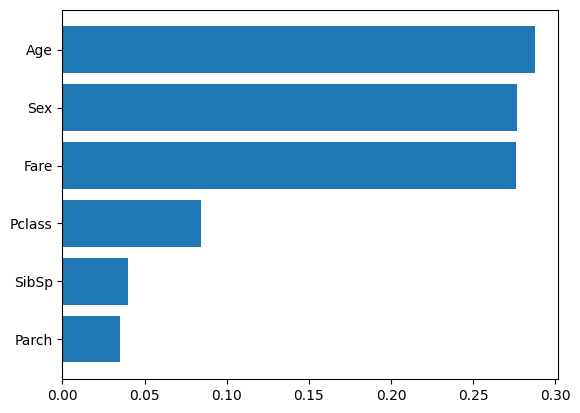

In [20]:
import matplotlib.pyplot as plt

features = X_train.columns
f_i = list(zip(features, RFC.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

It appears that only Age, Sex, and Fare really play any importance in determining who survived the Titanic. Therefore, we will proceed with only these columns. 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Preprocess data and standardize it
lr_data = X[['Age', 'Sex', 'Fare']]
scaler = StandardScaler()
scaler.fit(lr_data)
lr_X = scaler.transform(lr_data)
lr_X = pd.DataFrame(lr_X, columns = ['Age', 'Sex', 'Fare'])
lr_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Sex     714 non-null    float64
 2   Fare    714 non-null    float64
dtypes: float64(3)
memory usage: 16.9 KB


In [22]:
x_train, x_test, y_train, y_test = train_test_split(lr_X, Y, test_size=0.2, random_state=0)

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_hat = lr.predict(x_test)
print(accuracy_score(y_test, y_hat))

0.7832167832167832


In [24]:
lr_params = {
    'penalty': ['l2', None],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}

grid_lr = GridSearchCV(lr, lr_params)
grid_lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l2', None],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']})

In [25]:
Y_hat = grid_lr.predict(x_test)
print(accuracy_score(y_test, Y_hat))

0.7832167832167832


Only 78% accuracy, which is actually even worse than the original RFC model. Let's use our GridSearchCV on RFC to predict our final submission.

In [35]:
import csv

# Retrain model on whole dataset
grid_rfc = GridSearchCV(RFC, params)
grid_rfc.fit(X, Y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 10),
                         'n_estimators': [10, 50, 100, 250]})

In [40]:
df_test = pd.read_csv(r"C:\Users\kdhou\OneDrive\Documents\kaggle\Titanic - Machine Learning from Distaster\test.csv")
submission = df_test['PassengerId']
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [42]:
# Use label encoding to turn categorical variables into numeric values
le = LabelEncoder()
for column in df_test.columns:
    if df_test[column].dtype == object:
        df_test[column] = le.fit_transform(df_test[column])
    else:
        pass

In [43]:
outcomes = grid_rfc.predict(df_test)
outcomes = pd.DataFrame(outcomes)
outcomes

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [44]:
submission = pd.concat([submission, outcomes], axis=1)
submission

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [45]:
#Write to csv file
submission.to_csv(r"C:\Users\kdhou\OneDrive\Documents\kaggle\Titanic - Machine Learning from Distaster\submission.csv")